In [1]:
from counting import *
from tqdm import tqdm, trange

In [6]:
import numpy as np

In [6]:
rng = np.random.default_rng(0)
a_s = list()
b_s = list()

In [11]:
KNAPSACK_SIZE = 8

In [12]:
for i in range(1000):
    a = rng.integers(5, 20, (KNAPSACK_SIZE, ))
    b = rng.integers(1, np.sum(a)//2)
    a_s.append(a)
    b_s.append(b)

In [13]:
a_s

[array([17, 14, 12,  9,  9,  5,  6,  5], dtype=int64),
 array([17, 14, 18, 12, 14, 19, 15, 14], dtype=int64),
 array([13, 19,  9, 17, 15,  5, 10, 17], dtype=int64),
 array([ 5, 16, 15, 17,  7,  6, 17,  5], dtype=int64),
 array([ 6,  9, 12, 11, 11,  5,  5,  6], dtype=int64),
 array([15, 12, 14,  8, 14, 16, 10, 11], dtype=int64),
 array([17, 19, 10, 15, 19, 14, 17, 15], dtype=int64),
 array([10, 18,  7, 13, 15, 17, 12, 10], dtype=int64),
 array([11, 12, 15, 18,  6, 19, 12, 10], dtype=int64),
 array([13,  8,  9, 15, 13, 12, 10, 16], dtype=int64),
 array([ 9, 18,  8,  8, 15, 14,  5,  6], dtype=int64),
 array([17, 11, 16,  9,  8, 16, 18,  6], dtype=int64),
 array([15, 10, 13,  7, 17, 11, 18, 16], dtype=int64),
 array([ 8, 16,  5, 13, 11, 19,  7, 19], dtype=int64),
 array([14, 13, 18,  9, 18, 15, 18,  7], dtype=int64),
 array([19,  5, 10, 14,  6, 12, 14, 16], dtype=int64),
 array([11, 11, 12, 19,  7, 12,  5, 11], dtype=int64),
 array([14, 10, 19, 14, 19,  5, 11, 17], dtype=int64),
 array([11

In [23]:
from time import time

In [82]:
a = np.array([1]*25)
b = 5
fpras_knapsack(a, b, rng, delta = 0.2, epsilon = 0.05)

(66502.62434380948, 3325.131217190474, 0.2)

In [5]:
exact_counting(a, b)

NameError: name 'a' is not defined

In [24]:
times = list()

for i in tqdm(range(2, 22)):
    t = time()
    result, error, probability = fpras_knapsack(np.arange(1, i + 1), 2*i, rng, delta = 0.1, epsilon = 0.1)
    times.append(time()-t)

100%|██████████| 20/20 [09:02<00:00, 27.13s/it]


In [89]:
times_exact = list()
for i in tqdm(range(2, 22)):
    t = time()
    exact_counting(np.arange(1, i + 1), 2*i)
    times_exact.append(time()-t)

100%|██████████| 20/20 [00:28<00:00,  1.44s/it]


In [25]:
times

[0.23950815200805664,
 0.9840590953826904,
 1.2319369316101074,
 2.8107380867004395,
 3.7034013271331787,
 3.7921338081359863,
 8.177857398986816,
 8.843263864517212,
 9.333226203918457,
 17.093436241149902,
 18.19274115562439,
 19.364033222198486,
 33.4001727104187,
 35.11546301841736,
 35.81485056877136,
 37.64725065231323,
 73.90973544120789,
 77.97275972366333,
 77.46083283424377,
 77.44297003746033]

In [ ]:
np.arange(2, 22)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])

In [4]:
from matplotlib import pyplot as plt

In [28]:
plt.scatter(np.arange(2, 22), np.array(times_exact))

NameError: name 'times_exact' is not defined

In [32]:
f = open("dep_times_n copy.txt")
lines = f.readlines()
times = list()
numbers = list()
for line in lines:
    number, t = map(int, line.split())
    numbers.append(number)
    times.append(t/10**6)


In [33]:
times

[0.009611,
 0.084444,
 0.12693,
 0.154658,
 0.532838,
 0.641299,
 0.742194,
 0.858583,
 2.09372,
 2.364065,
 2.667214,
 2.936559,
 3.259311,
 6.498126,
 7.323203,
 8.034256,
 8.452862,
 9.223908,
 9.862816,
 16.762061]

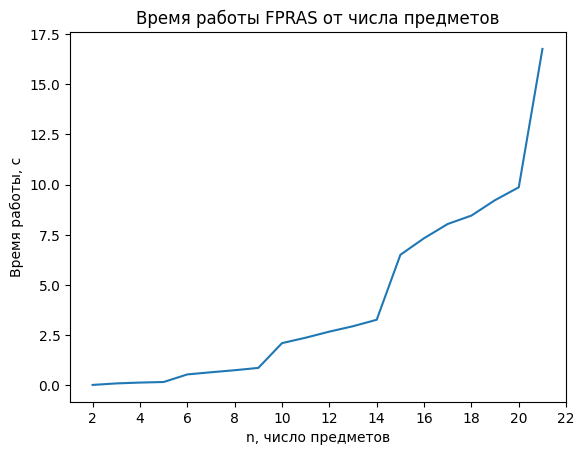

In [34]:
plt.plot(numbers, times)
plt.xlabel("n, число предметов")
plt.ylabel("Время работы, c")
plt.xticks(np.arange(2, 24, 2))
plt.title("Время работы FPRAS от числа предметов")
plt.show()

In [35]:
f = open("dep_times_eps.txt")
lines = f.readlines()
times = list()
epsilons = list()
for line in lines:
    epsilon, t = map(float, line.split())
    epsilons.append(epsilon)
    times.append(t/10**6)

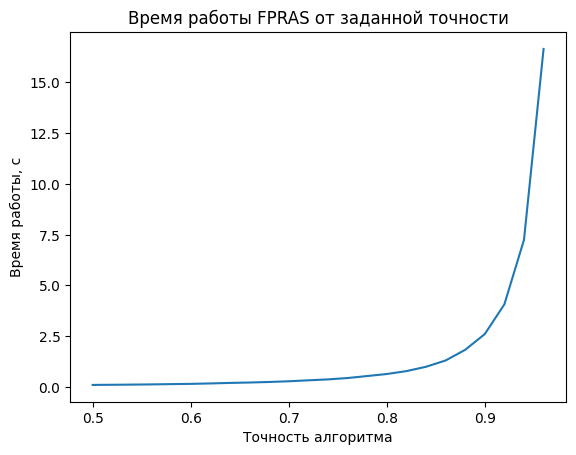

In [36]:
plt.plot(epsilons, times)
plt.xlabel("Точность алгоритма")
plt.ylabel("Время работы, c")
plt.xticks(np.arange(0.5, 0.98, 0.1))
plt.title("Время работы FPRAS от заданной точности")
plt.show()

In [37]:
f = open("dep_times_delta.txt")
lines = f.readlines()
times = list()
deltas = list()
for line in lines:
    delta, t = map(float, line.split())
    deltas.append(delta)
    times.append(t/10**6)

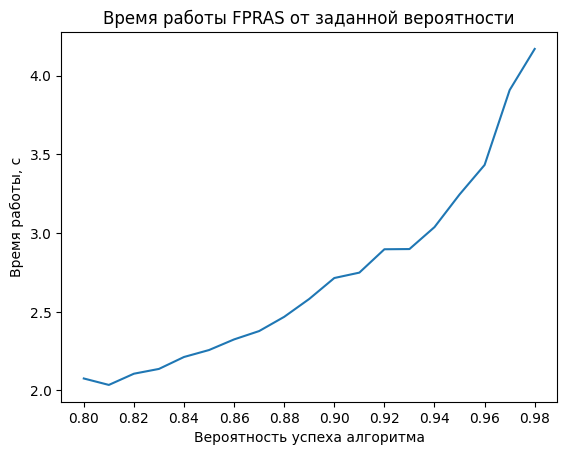

In [38]:
plt.plot(deltas, times)
plt.xlabel("Вероятность успеха алгоритма")
plt.ylabel("Время работы, c")
plt.xticks(np.arange(0.8, 0.99, 0.02))
plt.title("Время работы FPRAS от заданной вероятности")
plt.show()

In [3]:
a = [1]*9
b = 3


In [4]:
exact_result = exact_counting(a, b)

NameError: name 'a' is not defined

In [7]:
n_successes = 0
t = trange(200)
for i in t:
    result, error, probability = fpras_knapsack(a, b, rng, delta = 0.2, epsilon=0.05)
    if abs(result - exact_result) <= error:
        n_successes += 1
    t.set_postfix_str(f"correctness: {n_successes/(i+1)}")
print(n_successes)

  2%|▎         | 5/200 [00:10<06:53,  2.12s/it, correctness: 1.0]


KeyboardInterrupt: 

In [5]:
a = np.arange(1, 10)
b = 10


In [6]:
exact_result = exact_counting(a, b)

In [10]:
print(exact_result)

17


In [20]:
print(fpras_knapsack(a, b, rng, delta = 0.2, epsilon=0.05))

(19.03968253968254, 0.9519841269841272, 0.2)


In [11]:
n_successes = 0
t = trange(200)
for i in t:
    result, error, probability = fpras_knapsack(a, b, rng, delta = 0.2, epsilon=0.05)
    if abs(result - exact_result) <= error:
        n_successes += 1
    t.set_postfix_str(f"correctness: {n_successes/(i+1)}")
print(n_successes)

  2%|▏         | 4/200 [00:04<03:47,  1.16s/it, correctness: 0.5]               


KeyboardInterrupt: 

In [10]:
n_successes = 0
t = trange(200)
for i in t:
    result, error, probability = fpras_knapsack(a, b, rng, delta = 0.05, epsilon=0.05)
    if abs(result - exact_result) <= error:
        n_successes += 1
    t.set_postfix_str(f"correctness: {n_successes/(i+1)}")
print(n_successes)

100%|██████████| 200/200 [1:03:33<00:00, 19.07s/it, correctness: 0.96]              

192


In [11]:
a = [1]*16
b = 4

In [13]:
exact_result = exact_counting(a, b)

In [9]:
n_successes = 0
t = trange(200)
for i in t:
    result, error, probability = fpras_knapsack(a, b, rng, delta = 0.2, epsilon=0.05)
    if abs(result - exact_result) <= error:
        n_successes += 1
    t.set_postfix_str(f"correctness: {n_successes/(i+1)}")
print(n_successes)

100%|██████████| 200/200 [01:41<00:00,  1.97it/s, correctness: 0.48]               

96


In [15]:
n_successes = 0
t = trange(200)
for i in t:
    result, error, probability = fpras_knapsack(a, b, rng, delta = 0.05, epsilon=0.05)
    if abs(result - exact_result) <= error:
        n_successes += 1
    t.set_postfix_str(f"correctness: {n_successes/(i+1)}")
print(n_successes)

100%|██████████| 200/200 [1:40:45<00:00, 30.23s/it, correctness: 0.985]             

197


In [3]:
a = [1]*16
b = 1

In [4]:
exact_result = exact_counting(a, b)

In [5]:
n_successes = 0
t = trange(200)
for i in t:
    result, error, probability = fpras_knapsack(a, b, rng, delta = 0.2, epsilon=0.05)
    if abs(result - exact_result) <= error:
        n_successes += 1
    t.set_postfix_str(f"correctness: {n_successes/(i+1)}")
print(n_successes)

  0%|          | 0/200 [00:00<?, ?it/s]

NameError: name 'rng' is not defined

In [21]:
n_successes = 0
t = trange(200)
for i in t:
    result, error, probability = fpras_knapsack(a, b, rng, delta = 0.05, epsilon=0.05)
    if abs(result - exact_result) <= error:
        n_successes += 1
    t.set_postfix_str(f"correctness: {n_successes/(i+1)}")
print(n_successes)

100%|██████████| 200/200 [02:04<00:00,  1.60it/s, correctness: 0.475]              

95


In [123]:
pbar = tqdm(["a", "b", "c", "d"])
for char in pbar:
    pbar.set_description("Processing %s" % char)

Processing d: 100%|██████████| 4/4 [00:00<00:00, 798.80it/s]


In [ ]:
import numpy as np

class KnapsackCoupling:
    def __init__(self, weights, capacity, differing_item):
        self.weights = weights
        self.n = len(weights)
        self.C = capacity
        self.differing_item = differing_item  # Индекс предмета j, по которому отличаются S и T

        # Инициализация состояний S и T
        self.S = [0] * self.n
        self.T = [0] * self.n
        self.S[differing_item] = 1  # S содержит differing_item
        self.T[differing_item] = 0  # T — не содержит

        # Проверка валидности
        assert self.get_weight(self.S) <= self.C, "S должно быть валидным"
        assert self.get_weight(self.T) <= self.C, "T должно быть валидным"

    def get_weight(self, state):
        return sum(w * s for w, s in zip(self.weights, state))

    def is_add_allowed(self, state, item):
        return (self.get_weight(state) + self.weights[item]) <= self.C

    def coupled_transition(self):
        k = np.random.randint(self.n)  # Случайный выбор предмета
        new_S = self.S.copy()
        new_T = self.T.copy()

        if k != self.differing_item:
            # Синхронизированное обновление для k != differing_item
            # Удаляем или добавляем k в оба состояния, если возможно
            if self.S[k] == 1:
                new_S[k] = 0
                new_T[k] = 0
            else:
                if self.is_add_allowed(self.S, k):
                    new_S[k] = 1
                if self.is_add_allowed(self.T, k):
                    new_T[k] = 1
        else:
            # Обработка differing_item (j)
            # Удаляем j из S
            new_S[self.differing_item] = 0
            # Пытаемся добавить j в T
            if self.is_add_allowed(self.T, self.differing_item):
                new_T[self.differing_item] = 1
            else:
                new_T = self.T.copy()  # Если нельзя, оставляем T без изменений

        # Возвращаем новые состояния
        return new_S, new_T

    def distance(self, state1, state2):
        return sum(s1 != s2 for s1, s2 in zip(state1, state2))

    def simulate(self, trials=10000):
        total_distance = 0
        current_S = self.S.copy()
        current_T = self.T.copy()

        for _ in range(trials):
            # Обновляем состояния на каждом шаге
            new_S, new_T = self.coupled_transition()
            current_S, current_T = new_S, new_T
            total_distance += self.distance(current_S, current_T)

        avg_distance = total_distance / trials
        return avg_distance

# Пример с параметрами, где расстояние уменьшается
weights = [5, 5, 5]  # Веса предметов
capacity = 10         # Вместимость рюкзака
differing_item = 0    # Индекс предмета, по которому отличаются S и T

kp = KnapsackCoupling(weights, capacity, differing_item)
avg_distance = kp.simulate(trials=100000)
print(f"Среднее расстояние после 100000 шагов: {avg_distance:.4f}")

Среднее расстояние после 100000 шагов: 1.0000


In [ ]:
i

99

In [ ]:
import numpy as np

class KnapsackCoupling:
    def __init__(self, weights, capacity, differing_item):
        self.weights = weights
        self.n = len(weights)
        self.C = capacity
        self.differing_item = differing_item  # Предмет j, по которому отличаются S и T

        # Инициализация состояний S и T
        self.S = [0] * self.n
        self.T = [0] * self.n
        self.S[differing_item] = 1  # S содержит differing_item
        self.T[differing_item] = 0  # T — не содержит

        # Проверка валидности
        assert self.get_weight(self.S) <= self.C, "S должно быть валидным"
        assert self.get_weight(self.T) <= self.C, "T должно быть валидным"

    def get_weight(self, state):
        return sum(w * s for w, s in zip(self.weights, state))

    def is_add_allowed(self, state, item):
        return (self.get_weight(state) + self.weights[item]) <= self.C

    def coupled_transition(self, current_S, current_T):
        k = np.random.randint(self.n)  # Случайный выбор предмета
        new_S = current_S.copy()
        new_T = current_T.copy()

        if k != self.differing_item:
            # Синхронизированное обновление для k ≠ j
            if current_S[k] == 1:
                # Удаляем k из обоих состояний
                new_S[k] = 0
                new_T[k] = 0
            else:
                # Пытаемся добавить k в оба состояния, если возможно
                if self.is_add_allowed(current_S, k):
                    new_S[k] = 1
                if self.is_add_allowed(current_T, k):
                    new_T[k] = 1
        else:
            # Обработка предмета j
            # Удаляем j из S
            new_S[self.differing_item] = 0
            # Пытаемся добавить j в T только если это возможно
            if self.is_add_allowed(current_T, self.differing_item):
                new_T[self.differing_item] = 1
            else:
                new_T[self.differing_item] = 0  # Явно запрещаем добавление

        return new_S, new_T

    def distance(self, state1, state2):
        return sum(s1 != s2 for s1, s2 in zip(state1, state2))

    def simulate(self, trials=10**9):
        current_S = self.S.copy()
        current_T = self.T.copy()
        total_distance = 0

        for _ in range(trials):
            new_S, new_T = self.coupled_transition(current_S, current_T)
            current_S, current_T = new_S, new_T  # Обновляем состояния
            total_distance += self.distance(current_S, current_T)

        avg_distance = total_distance / trials
        return avg_distance

# Пример с параметрами, где расстояние уменьшается
weights = [1]*10  # Веса предметов
capacity = 5          # Вместимость рюкзака
differing_item = 2    # Индекс предмета j (вес 4)

kp = KnapsackCoupling(weights, capacity, differing_item)
avg_distance = kp.simulate()
print(f"Среднее расстояние после {trials} шагов: {avg_distance:.4f}")

KeyboardInterrupt: 

True


In [ ]:
print(n_successes/28)

0.9285714285714286


In [ ]:
print(n_successes)

100
